In [13]:
import pandas as pd
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup  # used for webscrapping
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jlod9\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
fin_url = 'https://finviz.com/quote.ashx?t='

In [76]:
tickers = ['MSFT', 'TSLA', 'GOOG', 'AMZN']

In [77]:
news_tables = {}
for ticker in tickers:
    url = fin_url + ticker
    req = Request(url, headers= {'user-agent' : 'my-app'})  # header allows us to actually download from the website
    response = urlopen(req)
    html = BeautifulSoup(response, 'html')   # pulling the source code from the website
    news_table = html.find(id = 'news-table')  # pulls the html object of the entire table for that ticker
    news_tables[ticker] = news_table

    
print(news_tables)  # this gives us the raw html data for the tables for each ticker

{'MSFT': <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
<tr><td align="right" style="white-space:nowrap" width="130">Apr-27-21 11:03AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/us-stocks-wall-street-edges-150323407.html" target="_blank">US STOCKS-Wall Street edges lower as Tesla, 3M weigh; big tech earnings in focus</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Reuters</span></div></div></td></tr>
<tr><td align="right" width="130">11:02AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.investors.com/market-trend/stock-market-today/dow-jones-falls-as-tesla-stock-skids-on-earnings-alphabet-amd-earnings-on-tap/?src=A00220" target="_blank">Dow Jones Falls As Tesla Skids On Earnings; Tech Giants Alphabet, AMD, Micros

In [78]:
parsed_data = []
for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        title = row.a.get_text()
        date_data = row.td.text.split(' ')  # we have to account for the fact that the date format varies slightly for different rows
        if len(date_data) == 1:
            time = date[0]
        else:
            date = date_data[0]
            time = date_data[1]
        parsed_data.append([ticker, date, time, title])
        
print(parsed_data)

[['MSFT', 'Apr-27-21', '11:03AM\xa0\xa0', 'US STOCKS-Wall Street edges lower as Tesla, 3M weigh; big tech earnings in focus'], ['MSFT', 'Apr-27-21', 'A', 'Dow Jones Falls As Tesla Skids On Earnings; Tech Giants Alphabet, AMD, Microsoft Set To Report'], ['MSFT', 'Apr-27-21', 'A', 'AWS is the most compelling component of Amazons story: analyst'], ['MSFT', 'Apr-27-21', 'A', 'Billionaire Bruce Kovners Trading Strategy and Top 10 Picks'], ['MSFT', 'Apr-27-21', 'A', 'Best Tech Stocks To Buy Or Watch Now: Wall Street Eyes Earnings from Microsoft, Facebook, Twitter'], ['MSFT', 'Apr-27-21', 'A', 'Should you buy Amazon stock? Analysts prefer it over other Big Tech companies'], ['MSFT', 'Apr-27-21', 'A', 'CORRECTED-US STOCKS-S&P 500, Nasdaq set for higher open as focus turns to tech earnings, Fed'], ['MSFT', 'Apr-27-21', 'A', 'Microsoft Teams down: Users around the world face outages'], ['MSFT', 'Apr-27-21', 'A', 'Microsoft Teams crash causes chaos for home workers worldwide'], ['MSFT', 'Apr-27-2

In [79]:
df = pd.DataFrame(parsed_data, columns = ['ticker', 'date', 'time', 'title'])

In [80]:
vader = SentimentIntensityAnalyzer()  # this is what we use to decide how positive or negative each headline is

In [81]:
df['compound'] = df['title'].apply(lambda x: vader.polarity_scores(x)['compound'])

In [82]:
print(df.head(20))

   ticker       date       time  \
0    MSFT  Apr-27-21  11:03AM     
1    MSFT  Apr-27-21          A   
2    MSFT  Apr-27-21          A   
3    MSFT  Apr-27-21          A   
4    MSFT  Apr-27-21          A   
5    MSFT  Apr-27-21          A   
6    MSFT  Apr-27-21          A   
7    MSFT  Apr-27-21          A   
8    MSFT  Apr-27-21          A   
9    MSFT  Apr-27-21          A   
10   MSFT  Apr-27-21          A   
11   MSFT  Apr-27-21          A   
12   MSFT  Apr-26-21  04:33PM     
13   MSFT  Apr-26-21          A   
14   MSFT  Apr-26-21          A   
15   MSFT  Apr-26-21          A   
16   MSFT  Apr-26-21          A   
17   MSFT  Apr-26-21          A   
18   MSFT  Apr-26-21          A   
19   MSFT  Apr-26-21          A   

                                                title  compound  
0   US STOCKS-Wall Street edges lower as Tesla, 3M...   -0.2960  
1   Dow Jones Falls As Tesla Skids On Earnings; Te...    0.0000  
2   AWS is the most compelling component of Amazon...    0.2716  


In [83]:
df['date'] = pd.to_datetime(df.date).dt.date

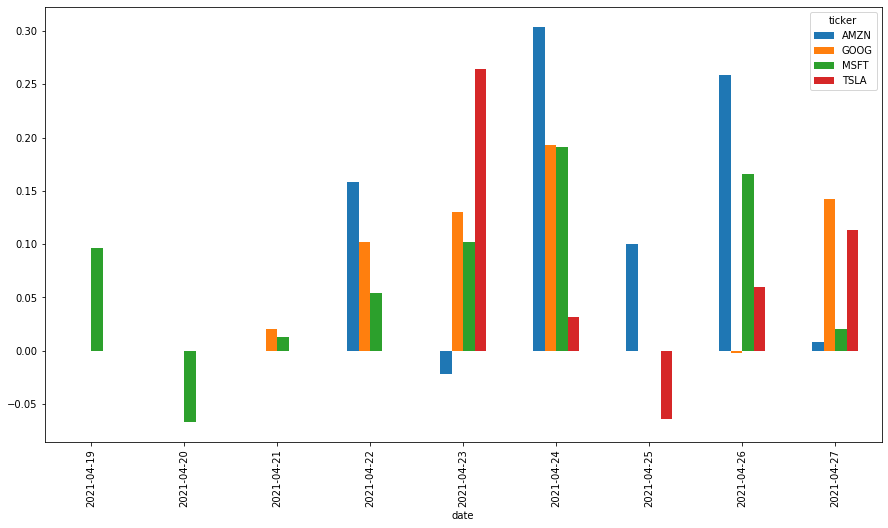

In [84]:
plt.rcParams["figure.figsize"] = (15,8)
mean_df = df.groupby(['ticker', 'date']).mean()
mean_df = mean_df.unstack()
mean_df = mean_df.xs('compound', axis  = 'columns').transpose()
mean_df.plot(kind='bar')
plt.show()